# DDPQ

Here I will use deep deterministic policy gradients (DDPG) to train on the reaching environment with a single agent

---

In this notebook, I use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

from ddpg_agent import Agent

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe',no_graphics=True)
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# create agent
agent = Agent(state_size=33, action_size=4, random_seed=20)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
def train_ddpg(agent, n_episodes=300, scores= [], scores_deque=deque(maxlen=100)):
    for i_episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        state = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()
        score = np.zeros(20)                                          # initialize the score (for each agent)
        for t in range(2000):
            action = agent.act(state, add_noise=True, episode_num=i_episode) # select an action (for each agent)
            env_info = env.step(action)[brain_name]           # send all actions to tne environment
            # unpack environment variables
            next_state = env_info.vector_observations         # get next state (for each agent)
            reward = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            score += env_info.rewards                         # update the score (for each agent)
            agent.step(state, action, reward, next_state, dones)
            state = next_state                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        scores.append(score)
        scores_deque.append(score)

        # print status every 20 episodes
        if i_episode %20 == 0:
            print('\rEpisode {}\tAverage Score: {:2f}'.format(i_episode, np.mean(scores_deque)))
            agent.save_actor_critic(episode_num=i_episode)
    agent.save_training_run(scores, episode_num=i_episode)
    return scores

Episode 0	Average Score: 0.685000
Episode 20	Average Score: 17.251238
Episode 40	Average Score: 27.578829
Episode 60	Average Score: 31.328745
Episode 80	Average Score: 32.681468
Episode 100	Average Score: 33.618294
Episode 120	Average Score: 37.217694
Episode 140	Average Score: 36.876299
Episode 160	Average Score: 36.402139
Episode 180	Average Score: 36.371679
Episode 200	Average Score: 36.350164
Episode 220	Average Score: 35.962544
Episode 240	Average Score: 35.776024
Episode 260	Average Score: 35.364454
Episode 280	Average Score: 34.946649
Episode 300	Average Score: 35.025559
Episode 320	Average Score: 35.277094
Episode 340	Average Score: 34.828154
Episode 360	Average Score: 34.529014
Episode 380	Average Score: 34.989434
Episode 400	Average Score: 34.816339
Episode 420	Average Score: 34.305144
Episode 440	Average Score: 34.001234
Episode 460	Average Score: 33.433119
Episode 480	Average Score: 32.673009
Episode 500	Average Score: 32.196129
Episode 520	Average Score: 32.317104
Episode 

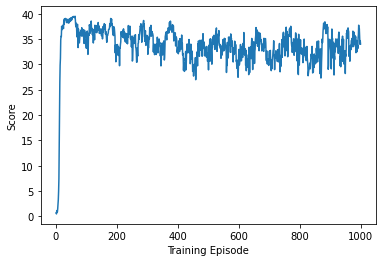

In [4]:
scores = train_ddpg(agent, n_episodes=1000)

When finished, you can close the environment.

In [7]:
env.close()